# IMBD Data Set : Hypothesis test and Analysis

In [25]:
import numpy as np
import pandas as pd
from scipy.stats import norm,t,linregress
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors



In [26]:
data = pd.read_csv("IMDb movies.csv")
genres = data.genre.unique()
data

/Users/haroldsmith/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


count    2268.000000
mean        4.386199
std         1.277780
min         1.000000
25%         3.400000
50%         4.400000
75%         5.300000
max         8.500000
Name: avg_vote, dtype: float64


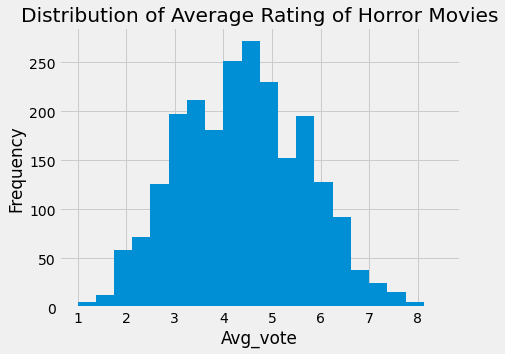

In [27]:
horror = data.loc[(data['genre'] == "Horror")]
drama = data.loc[(data['genre'] == "Drama")]
genres = [horror,drama]

result = pd.concat(genres)
result

#incedence = pd.crosstab(result["duration"],result["genre"])
horror_mean = horror["avg_vote"].mean()
drama_mean = drama["avg_vote"].mean()
horror_std = horror["avg_vote"].std()
drama_std = drama["avg_vote"].std()

horror_pop = len(horror.index)
drama_pop = len(drama.index)

print(horror.avg_vote.describe())

plt.hist(horror["avg_vote"], bins = 20)
plt.xlabel('Avg_vote')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.title('Distribution of Average Rating of Horror Movies')
#plt.text(120, 350, r'$\mu=88.35,\ \sigma=12.26$')


plt.grid(True)

plt.show()


count    12543.000000
mean         6.357076
std          0.964083
min          1.000000
25%          5.900000
50%          6.500000
75%          7.000000
max          9.700000
Name: avg_vote, dtype: float64


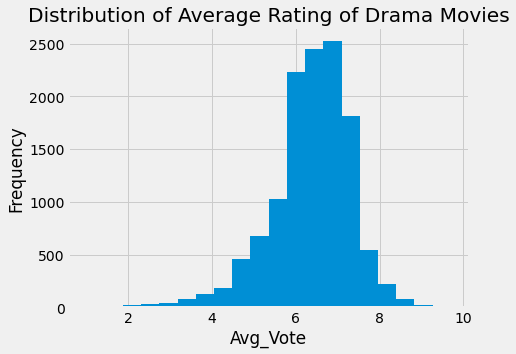

In [28]:
plt.hist(drama["avg_vote"], bins = 20)
print(drama.avg_vote.describe())
plt.xlabel('Avg_Vote')
plt.ylabel('Frequency')
plt.title('Distribution of Average Rating of Drama Movies')
#plt.text(120, 1500, r'$\mu=95.26,\ \sigma=15.41$')

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.grid(True)
plt.show()

# Data Visualization

The movies dataset includes 85,855 movies with attributes such as movie description, average rating, number of votes, genre, etc.

The data was scraped from the IMDB Website 


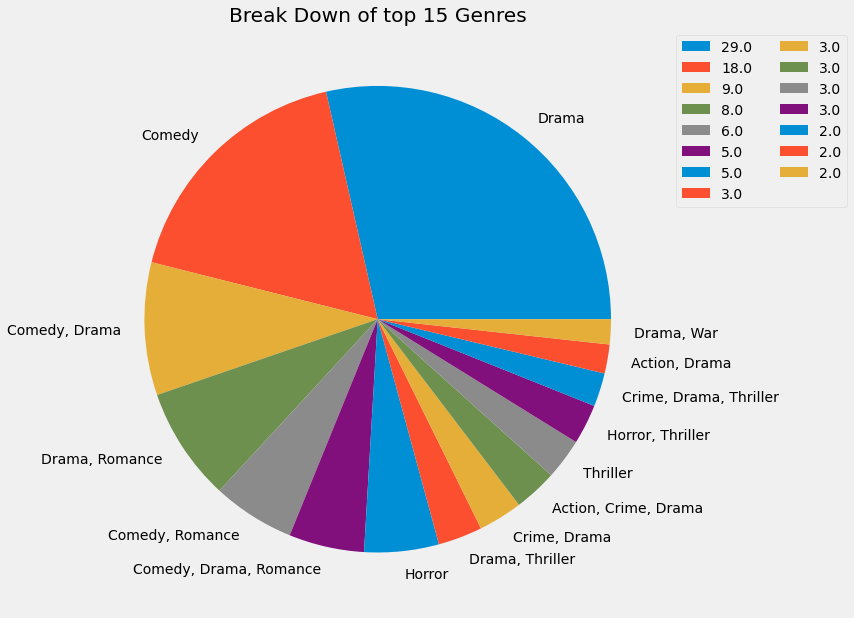

In [29]:
df_genre_count = data['genre'].value_counts().sort_values(ascending=False)
df_genre_name = data['genre'].value_counts().sort_values(ascending=False)
top_genre_count = df_genre_count.head(15)
top_genre_name = df_genre_name.index[0:15]
plt.figure(figsize = (10,10))
plt.pie(top_genre_count,labels = top_genre_name)
plt.title("Break Down of top 15 Genres")
percentages = round(100*top_genre_count/sum(top_genre_count))
plt.legend(percentages,ncol = 2,bbox_to_anchor=(1, 1))
                    
plt.show()
#percentages

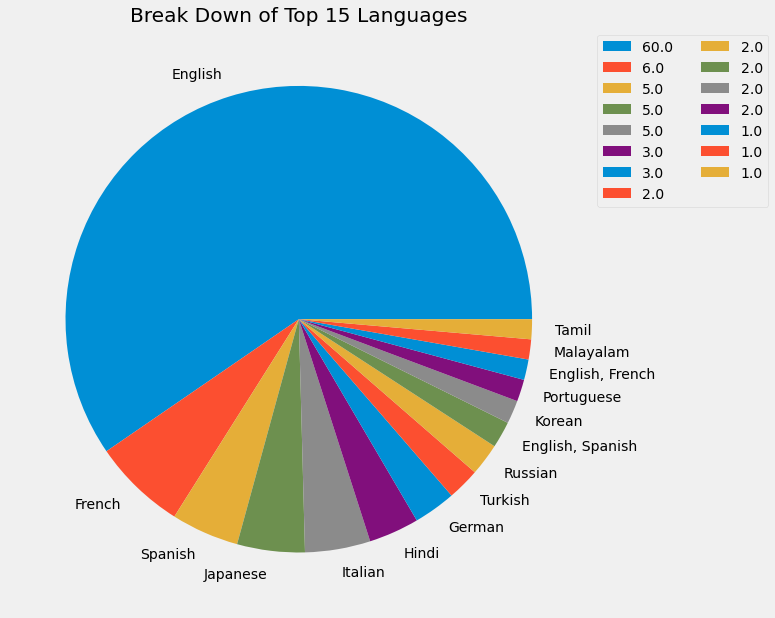

In [30]:
df_languages_count = data['language'].value_counts().sort_values(ascending=False)
df_lang_name = data['language'].value_counts().sort_values(ascending=False)
top_lang_count = df_languages_count.head(15)
top_lang_name = df_lang_name.index[0:15]
plt.figure(figsize = (10,10))
plt.pie(top_lang_count,labels = top_lang_name)
plt.title("Break Down of Top 15 Languages")
percentages = round(100*top_lang_count/sum(top_lang_count))
plt.legend(percentages,ncol = 2,bbox_to_anchor=(1, 1))
plt.show()




 # Outliers

In [31]:


## Need to Finish this part
def outliers(array):
    Q1, Q3 = np.percentile(sorted(array), [25,75])
    IQR = Q3 - Q1

    IQR_clean_data_index = []
    IQR_outlier_index = []

    for item in array:
        if (Q1 - 1.5 * IQR) < item < (Q3 + 1.5 * IQR):
            IQR_clean_data_index.append(item)
        else:
            IQR_outlier_index.append(item)

    return IQR_outlier_index

outliers_horror = outliers(horror["avg_vote"].to_list())
outliers_drama = outliers(drama["avg_vote"].to_list())
print("Horror Movies considered to be outliers based on avg_vote")
horror.loc[horror["avg_vote"] == outliers_horror[0]]




Horror Movies considered to be outliers based on avg_vote


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
54723,tt11542194,Kaaal,Kaaal,2020,2020-01-31,Horror,109,India,Marathi,D. Sandeep,...,"Shreyas Behere, Vaibhavi Chavan, Satish Gejage...",The film is about a group of youngsters aiming...,8.5,486,NaN,NaN,NaN,NaN,22.0,NaN


In [32]:
print("Drama Movies considered to be outliers based on avg_vote")
print(drama[drama["avg_vote"].isin(outliers_drama)])

Drama Movies considered to be outliers based on avg_vote


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
450,tt0016377,Soul-Fire,Soul-Fire,1925,1925-05-31,Drama,88,USA,English,John S. Robertson,...,"Richard Barthelmess, Bessie Love, Percy Ames, ...",NaN,4.1,112,NaN,NaN,NaN,NaN,3.0,NaN
641,tt0018910,Quattro mura,Four Walls,1928,1928-08-11,Drama,60,USA,NaN,William Nigh,...,"John Gilbert, Joan Crawford, Vera Gordon, Carm...",While Benny is in jail his old henchman Monk t...,3.9,307,NaN,NaN,NaN,NaN,NaN,1.0
670,tt0019335,Rose-Marie,Rose-Marie,1928,1928-02-11,Drama,70,USA,English,Lucien Hubbard,...,"Joan Crawford, James Murray, House Peters, Cre...",Sergeant Malone of the Mounties and effeminate...,3.5,123,NaN,NaN,NaN,NaN,NaN,2.0
6309,tt0041865,Wild Weed,Wild Weed,1949,1949-07-20,Drama,70,USA,English,Sam Newfield,...,"Lila Leeds, Alan Baxter, Lyle Talbot, Mary Ell...",A chorus girl's career is ruined and her broth...,3.9,300,NaN,NaN,NaN,NaN,13.0,11.0
7588,tt0045826,Glen or Glenda,Glen or Glenda,1953,1953-04-01,Drama,65,USA,English,Edward D. Wood Jr.,...,"Bela Lugosi, Lyle Talbot, Timothy Farrell, Dol...",A psychiatrist tells the stories of a transves...,4.2,7859,$ 20000,$ 10158,$ 10158,NaN,135.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84706,tt8774388,The Angel of Auschwitz,The Angel of Auschwitz,2019,2019-11-17,Drama,101,UK,English,Terry Lee Coker,...,"Noeleen Comiskey, Steven Bush, Hayley-Marie Ax...",This is a tale of how the angel of life was co...,2.5,146,GBP 200000,NaN,NaN,NaN,10.0,NaN
85022,tt9020894,Vremennye trudnosti,Vremennye trudnosti,2018,2018-09-13,Drama,86,Russia,Russian,Mikhail Raskhodnikov,...,"Rinal Mukhametov, Ivan Okhlobystin, Irina Pego...",Sasha Korolev has a congenital disorder. The b...,3.1,471,NaN,NaN,$ 1312189,NaN,3.0,5.0
85536,tt9537008,Gini Helida Kathe,Gini Helida Kathe,2019,2019-01-11,Drama,138,India,Kannada,Nagaraja Uppunda,...,"Githanjali, Loki, Malathesh","Gini aka Ganesh, a cab driver meets a passenge...",9.1,234,NaN,NaN,NaN,NaN,2.0,NaN
85542,tt9537346,Ardaas Karaan,Ardaas Karaan,2019,2019-07-18,Drama,140,India,Punjabi,Gippy Grewal,...,"Gippy Grewal, Gurpreet Ghuggi, Sapna Pabbi, Ma...","During times of conflict, three elderly men tr...",8.8,1360,NaN,NaN,$ 752481,NaN,141.0,2.0


# 2 Sample T-test


A) H_0: $\mu_{difference} = 0$                                                                            
B) H_a: $\mu_{drama} \neq \mu_{horror}$                                                                          
C) $\overline{X}$ is the mean difference in the average rating between horror movies and drama movies                                                                         
D) we are going to use the t distribution, since we do not know the population std

In [33]:
horror_samp = horror.sample(150, replace = True)
drama_samp = drama.sample(150,replace = True)

horror_mean = horror_samp["avg_vote"].mean()
drama_mean = drama_samp["avg_vote"].mean()

horror_std = horror_samp["avg_vote"].std()
drama_std = drama_samp["avg_vote"].std()
#horror_mean,drama_mean,horror_std,drama_std

In [34]:
dif = drama_mean-horror_mean

se = np.sqrt(((drama_std**2)/150)+((horror_std**2)/150))
tstat = dif / se
dof = 150
pval = 2*t.sf(abs(tstat), df = dof)
t_star = t.ppf(1-.05/2, dof)

print("The test statistic is ", tstat)
print("The standard error was, ",se)
print("Our degrees of freedom was ",dof)
print("Our pvalue is",pval," which is the probability that by random chance we get a difference in mean rating that is 0")

#dif,t_star,lower,upper


The test statistic is  14.51419912795343
The standard error was,  0.12553224493736923
Our degrees of freedom was  150
Our pvalue is 2.250265600497007e-30  which is the probability that by random chance we get a difference in mean rating that is 0


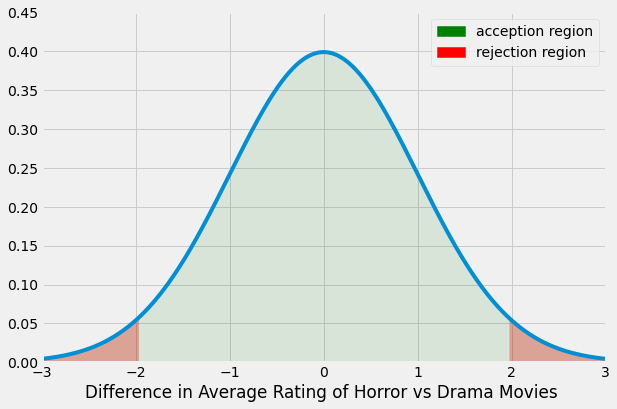

In [36]:
okay = norm.ppf(pval, loc = 0 , scale = 1)

x_above = np.arange(t_star,3, 0.001) # range of x in spec
x_below = np.arange(-3,-t_star,0.001)
x_all = np.arange(-3, 3, 0.001) # entire range of x, both in and out of spec
# mu = 40, sigma = 10, 
y = norm.pdf(x_above,0,1)
y2 = norm.pdf(x_all,0,1)
y3 = norm.pdf(x_below,0,1)
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)
ax.fill_between(x_below,y3,0,alpha = 0.3,color = 'r')
ax.fill_between(x_above,y,0, alpha=0.3, color='r')
ax.fill_between(x_all,y2,0, alpha=0.1,color = 'g')
ax.set_xlim([-3,3])
plt.plot(tstat,0.005,"ro") # plotting the test staistic
ax.set_xlabel('Difference in Average Rating of Horror vs Drama Movies ')
ax.set_ylim([0,0.45])
ax.set_title('')
lables = ["rejection region","acception regoin"]
red_patch = mpatches.Patch(color='red', label='rejection region')
green_patch = mpatches.Patch(color='green', label='acception region')
plt.legend(handles = [green_patch,red_patch])
plt.show()

# Conclusion

Since our pvalue is less than our given alpha of 0.05 we reject the Null hypothesis that the mean rating for Drama Movies is the same as the mean Rating for Horror movies.




# Linear Regression: BUDGET vs. World Wide Gross Income

In [12]:

# have to clean some data to get rid of the $ singn and convert to a float

cleaned_data = data.dropna(axis = 0,subset = ["budget"])
cleaned_data = data[(data['budget'].str.contains('\$\s').fillna(False)) & (data['worlwide_gross_income'].str.contains('\$\s').fillna(False))]
cleaned_data['worlwide_gross_income'] = cleaned_data['worlwide_gross_income'].str.strip('\$\s').astype('float64')
cleaned_data["budget"] = cleaned_data['budget'].str.strip('\$\s').astype('float64')

cleaned_data

<ipython-input-12-bb030cace36a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['worlwide_gross_income'] = cleaned_data['worlwide_gross_income'].str.strip('\$\s').astype('float64')
<ipython-input-12-bb030cace36a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["budget"] = cleaned_data['budget'].str.strip('\$\s').astype('float64')


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
165,tt0010323,Il gabinetto del dottor Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,German,Robert Wiene,...,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.1,55601,18000.0,$ 8811,8811.0,NaN,237.0,160.0
245,tt0012190,I quattro cavalieri dell'Apocalisse,The Four Horsemen of the Apocalypse,1921,1923-04-16,"Drama, Romance, War",150,USA,None,Rex Ingram,...,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",An extended family split up in France and Germ...,7.2,3058,800000.0,$ 9183673,9183673.0,NaN,45.0,16.0
251,tt0012349,Il monello,The Kid,1921,1923-11-26,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,...,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...","The Tramp cares for an abandoned child, but ev...",8.3,109038,250000.0,NaN,26916.0,NaN,173.0,105.0
348,tt0014624,La donna di Parigi,A Woman of Paris: A Drama of Fate,1923,1927-06-06,"Drama, Romance",82,USA,"None, English",Charles Chaplin,...,"Edna Purviance, Clarence Geldart, Carl Miller,...",A kept woman runs into her former fiancé and f...,7.0,4735,351000.0,NaN,11233.0,NaN,37.0,24.0
415,tt0015864,La febbre dell'oro,The Gold Rush,1925,1925-10-23,"Adventure, Comedy, Drama",95,USA,"English, None",Charles Chaplin,...,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",A prospector goes to the Klondike in search of...,8.2,97480,923000.0,NaN,26916.0,NaN,190.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85477,tt9448656,Plane Tree,Plane Tree,2018,2019-04-12,Drama,99,Turkey,Turkish,Mustafa Karadeniz,...,"Sezgin Cengiz, Silan Düzdaban, Yunus Emre Çeli...",NaN,6.8,168,200000.0,NaN,4183.0,NaN,3.0,NaN
85530,tt9527778,Doblemente Embarazada,Doblemente Embarazada,2019,2019-12-20,Comedy,98,Mexico,Spanish,Koko Stambuk,...,"Roberta Burns, Gustavo Egelhaaf, Luis Felipe C...","A month before marrying Javier, Cristina decid...",4.4,197,950000.0,NaN,965558.0,NaN,4.0,NaN
85592,tt9611484,Quezon's Game,Quezon's Game,2018,2019-05-29,"Drama, History",127,Philippines,English,Matthew E. Rosen,...,"Raymond Bagatsing, Rachel Alejandro, Kate Alej...","In 1938, Philippine President Manuel L. Quezon...",7.5,117,500000.0,NaN,5986.0,36.0,15.0,17.0
85740,tt9779516,Cosa mi lasci di te,I Still Believe,2020,2020-03-19,"Biography, Drama, Music",116,USA,English,"Andrew Erwin, Jon Erwin",...,"K.J. Apa, Britt Robertson, Nathan Parsons, Gar...",The true-life story of Christian music star Je...,6.5,6196,12000000.0,$ 9868521,13681524.0,41.0,151.0,52.0


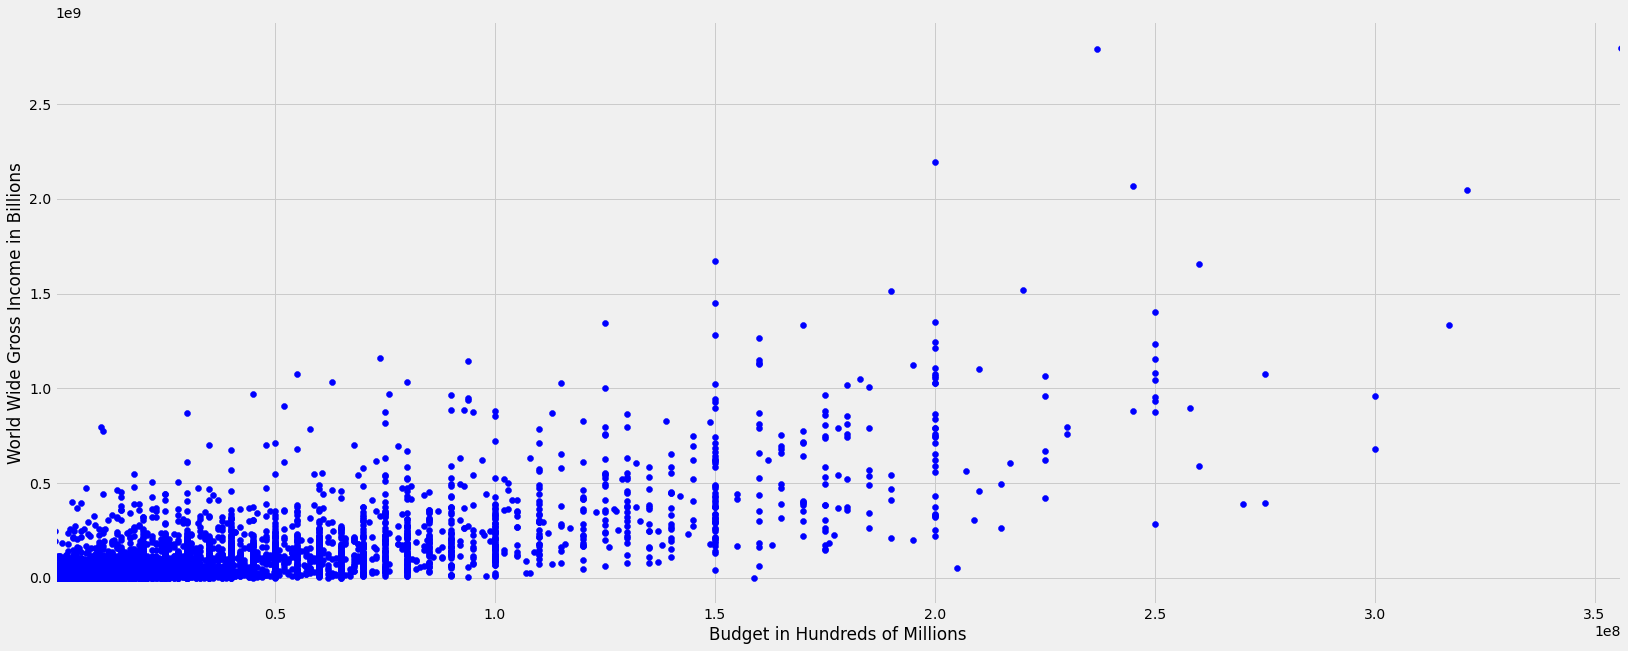

In [13]:
plt.figure(figsize = (25,10))

x = cleaned_data["budget"].to_list()
y = cleaned_data["worlwide_gross_income"].to_list()


plt.scatter(x,y,c = 'b')
plt.xlim(min(x),max(x))
plt.ylim=(min(x),max(x))
plt.ylabel("World Wide Gross Income in Billions")
plt.xlabel("Budget in Hundreds of Millions")


plt.show()
# plotting our data 

# Description of the data

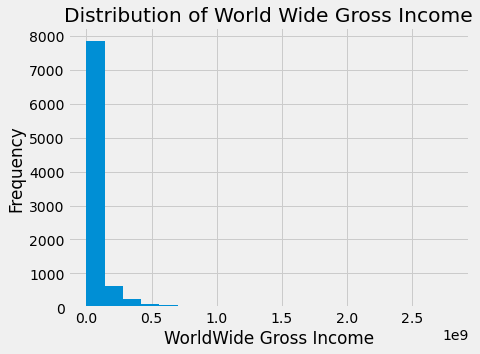

count    9.025000e+03
mean     6.602034e+07
std      1.537242e+08
min      1.600000e+01
25%      9.420410e+05
50%      1.236187e+07
75%      5.829230e+07
max      2.797801e+09
Name: worlwide_gross_income, dtype: float64

In [14]:

plt.hist(cleaned_data["worlwide_gross_income"], bins = 20)
plt.xlabel('WorldWide Gross Income')
plt.ylabel('Frequency')
plt.title('Distribution of World Wide Gross Income')
plt.show()
cleaned_data.worlwide_gross_income.describe()

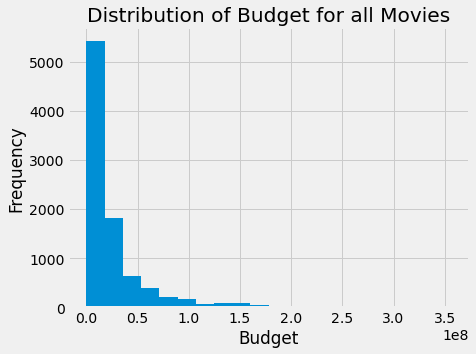

count    9.025000e+03
mean     2.473125e+07
std      3.581816e+07
min      1.000000e+00
25%      3.900000e+06
50%      1.200000e+07
75%      3.000000e+07
max      3.560000e+08
Name: budget, dtype: float64


In [15]:
plt.hist(cleaned_data["budget"], bins = 20)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Budget for all Movies')
plt.show()
print(cleaned_data.budget.describe())


# Outliers

In [16]:

outliers_budget = outliers(cleaned_data["budget"].to_list())
outliers_wgi = outliers(cleaned_data["worlwide_gross_income"].to_list())
print("Movies considered to be outliers based on Budget")
cleaned_data.loc[cleaned_data["budget"].isin(outliers_budget)]

Movies considered to be outliers based on Budget


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
24340,tt0096438,Chi ha incastrato Roger Rabbit,Who Framed Roger Rabbit,1988,1988-12-02,"Animation, Adventure, Comedy",104,USA,English,"Robert Zemeckis, Richard Williams",...,"Bob Hoskins, Christopher Lloyd, Joanna Cassidy...",A toon-hating detective is a cartoon rabbit's ...,7.7,178487,70000000.0,$ 156452370,329803958.0,83.0,287.0,144.0
24385,tt0096754,The Abyss,The Abyss,1989,1989-12-22,"Adventure, Drama, Mystery",171,USA,English,James Cameron,...,"Ed Harris, Mary Elizabeth Mastrantonio, Michae...",A civilian diving team is enlisted to search f...,7.6,159766,70000000.0,$ 54461047,90000098.0,62.0,433.0,106.0
25215,tt0099423,58 minuti per morire - Die Harder,Die Hard 2,1990,1990-07-03,"Action, Thriller",124,USA,"English, Spanish",Renny Harlin,...,"Bruce Willis, Bonnie Bedelia, William Atherton...",John McClane attempts to avert disaster as rog...,7.2,329774,70000000.0,$ 117540947,240247433.0,67.0,365.0,163.0
25980,tt0102057,Hook - Capitan Uncino,Hook,1991,1992-03-27,"Adventure, Comedy, Family",142,USA,English,Steven Spielberg,...,"Dustin Hoffman, Robin Williams, Julia Roberts,...","When Captain James Hook kidnaps his children, ...",6.8,229358,70000000.0,$ 119654823,300854823.0,52.0,415.0,94.0
26297,tt0103064,Terminator 2 - Il giorno del giudizio,Terminator 2: Judgment Day,1991,1991-12-19,"Action, Sci-Fi",137,"USA, France","English, Spanish",James Cameron,...,"Arnold Schwarzenegger, Linda Hamilton, Edward ...","A cyborg, identical to the one who failed to k...",8.5,974970,102000000.0,$ 205881154,520884847.0,75.0,1279.0,296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82394,tt7349950,It - Capitolo due,It Chapter Two,2019,2019-09-05,"Drama, Fantasy, Horror",169,"Canada, USA","English, North American Indian, Spanish",Andy Muschietti,...,"Jessica Chastain, James McAvoy, Bill Hader, Is...",Twenty-seven years after their first encounter...,6.5,192182,79000000.0,$ 211593228,473093228.0,58.0,2231.0,423.0
82693,tt7504726,Il richiamo della foresta,The Call of the Wild,2020,2020-02-20,"Adventure, Drama, Family",100,"Canada, USA","English, French",Chris Sanders,...,"Harrison Ford, Omar Sy, Cara Gee, Dan Stevens,...",A sled dog struggles for survival in the wilds...,6.8,29152,135000000.0,$ 62342368,107604626.0,47.0,427.0,163.0
83078,tt7713068,Birds of Prey e la fantasmagorica rinascita di...,Birds of Prey: And the Fantabulous Emancipatio...,2020,2020-02-06,"Action, Adventure, Crime",109,USA,"English, Chinese",Cathy Yan,...,"Margot Robbie, Rosie Perez, Mary Elizabeth Win...","After splitting with the Joker, Harley Quinn j...",6.1,137373,84500000.0,$ 84158461,201858461.0,60.0,2222.0,372.0
83528,tt7975244,Jumanji - The Next Level,Jumanji: The Next Level,2019,2019-12-25,"Action, Adventure, Comedy",123,USA,English,Jake Kasdan,...,"Dwayne Johnson, Kevin Hart, Jack Black, Karen ...","In Jumanji: The Next Level, the gang is back b...",6.7,168698,125000000.0,$ 316831246,796575993.0,58.0,940.0,241.0


In [45]:
cleaned_data.loc[cleaned_data["worlwide_gross_income"].isin(outliers_wgi)]

cleaned_data.loc[cleaned_data["worlwide_gross_income"] == cleaned_data["worlwide_gross_income"].max()]
cleaned_data["revenue"] = cleaned_data["worlwide_gross_income"] - cleaned_data["budget"]

cleaned_data.loc[cleaned_data["revenue"] == cleaned_data["revenue"].min()]


<ipython-input-45-e7d6bf96bf31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["revenue"] = cleaned_data["worlwide_gross_income"] - cleaned_data["budget"]


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,revenue
56680,tt1302006,The Irishman,The Irishman,2019,2019-11-27,"Biography, Crime, Drama",209,USA,"English, Italian, Latin, Spanish, German",Martin Scorsese,...,An old man recalls his time painting houses fo...,7.9,304528,159000000.0,NaN,968853.0,94.0,2705.0,438.0,-158031147.0


# HYPOTHESIS TEST

In [22]:



slope, intercept, r, p, se = linregress(x,y) 
print("a) the indpendent variable for this test is the world wide gross income")

print("The corelation coefficient is",r)
print("b) y = {:f}x + {:}".format(slope,intercept))

print("c) i.The slope of the regression line is {:f} ".format(slope))
print("   ii.The intercept is {:f}".format(intercept))
print('''  iii. The correlation coeefcient is ''',r,'''
        meaning that has an fairly strong positive correlation''')
print('''   iv. the coeffieficient of determination is {:f}
        meaning that {:f}% of the variation in the budget 
        for a movie can be explained by variation in the world wide gross income'''.format(r**2,100*(r**2)))
print()
print("Significance Test")
print("------------------")

print("H_0: p = 0")
print("H_a: p != 0")
print("we are using a t distribution")
tstat = (r*np.sqrt(len(x)-2))/np.sqrt(1-(r**2))
dof =len(x) -2
print("The test staistic is ", tstat)
print("The Pvalue for this test is",p)

print("Since our Pvalue is smaller than our given confidence level of 0.05 we reject the null hypothesis that there is no linear relationship")

print(dof)

a) the indpendent variable for this test is the world wide gross income
The corelation coefficient is 0.7519531533964472
b) y = 3.227229x + -13793061.945692569
c) i.The slope of the regression line is 3.227229 
   ii.The intercept is -13793061.945693
  iii. The correlation coeefcient is  0.7519531533964472 
        meaning that has an fairly strong positive correlation
   iv. the coeffieficient of determination is 0.565434
        meaning that 56.543354% of the variation in the budget 
        for a movie can be explained by variation in the world wide gross income

Significance Test
------------------
H_0: p = 0
H_a: p != 0
we are using a t distribution
The test staistic is  108.35230733168663
The Pvalue for this test is 0.0
Since our Pvalue is smaller than our given confidence level of 0.05 we reject the null hypothesis that there is no linear relationship
9023


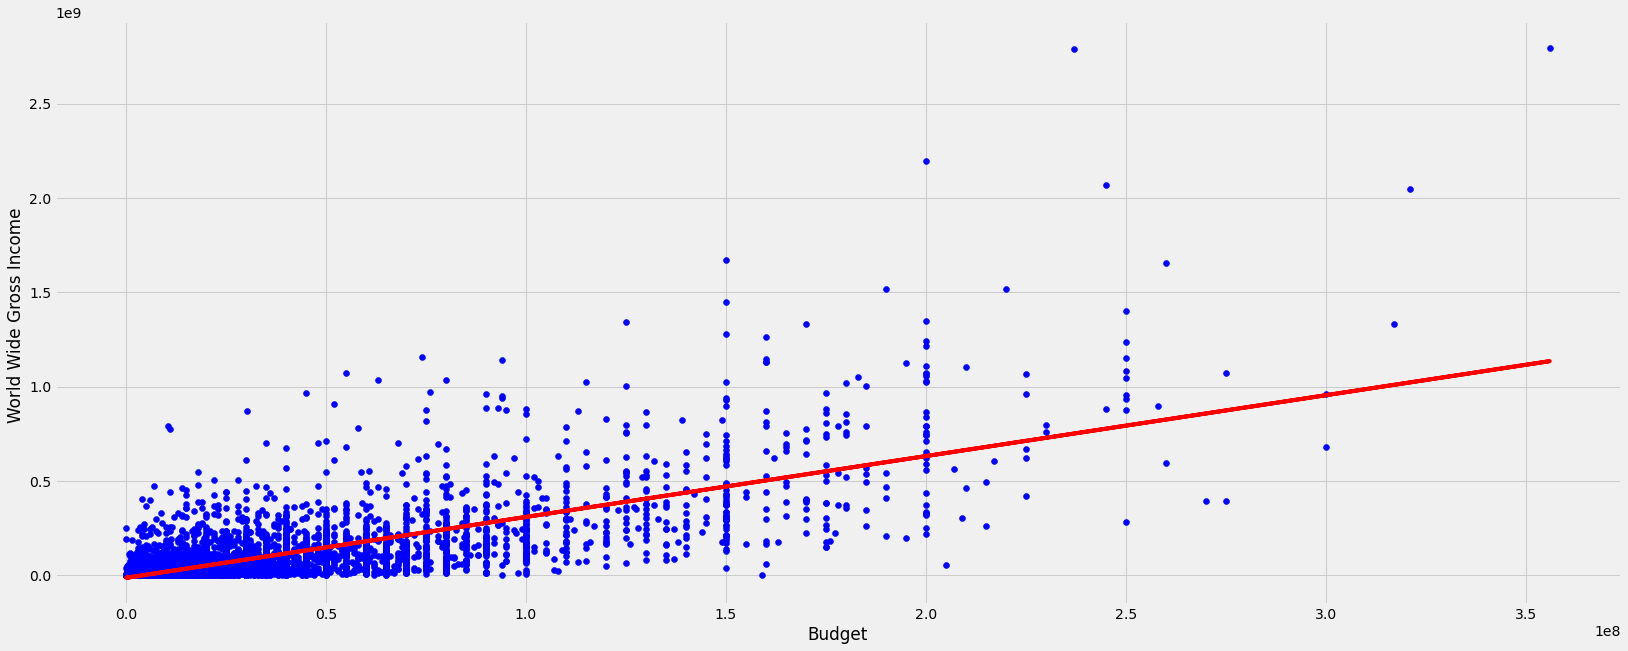

In [19]:
plt.figure(figsize = (25,10))
abline_values = [slope * i + intercept for i in x]
plt.scatter(x,y,c = 'b')
plt.xlabel("Budget")
plt.ylabel("World Wide Gross Income ")

plt.plot(x, abline_values, 'r')

# Conclusion

The r coeffictient is fairly strong and positive and close to 1. The hypothesis test preformed came back that there is significant evidence against the null hypothesis.  

# Write Up

  All of the data used in this project came from kaggle.com ( https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset). This dataset is scraped from IMDb.com, which is a website dedicated to the reviewing of movies and other information about the movies. In the data set there are 85,855 movies spanning 1894 all the way up to 2020. There is information on average rating, money grossed, genre, language or even director. It is however an incomplete data set, so cleaning and selecting certain data was necessary. Looking at some of the characteristics of the data, from the visual created we can see that Drama has the highest frequency in the data set followed closely by comedy. Looking at the breakdown of languages we can see that English is the most frequent language by quite a lot followed by french. 

   The First test performed was a 2 sample t test comparing the difference in means of average imdb ratings between Horror movies and Drama movies. In the data set there were movies which were considered multiple genres. For the sake of simplicity I decided to select only those movies which were considered pure Horror movies and those considered pure Drama. Looking at the distribution of the two genres it is visibly clear that the distribution of the rating for the two genres were different. Drama was skewed left and Horror had a wider squatter distribution, indicating a larger standard deviation. 
    
For this test I used a student's t distribution, testing the null hypothesis that $\mu_{difference} = 0$, with an alternative hypothesis of  $\mu_{drama} \neq \mu_{horror}$ thus we used a two sided t test. The test statistic that we tested was 14.5141 with a standard error of 0.12553224493736923 having 150 degrees of freedom. Our test statistic that we used is very far off from the expected value under the distribution, not being able to fit on the graph I made. The p value is 2.250265600497007e-30  which is the probability that by random chance we get a difference in mean rating that is 0. Therefore it is statistically highly unlikely that our data collected occurred under the null hypothesis, and for that reason the null hypothesis is rejected in favor of the alternative hypothesis. Or in other words, there was significant statistical evidence to say that mean ratings or drama and horror movies were different. Interestingly enough, this makes sense when looking at some real world statistics from the Oscars. Only 18 horror movies have ever won an academy award versus the 473 academy nominations for drama movies and 75 awards. Drama is also the most frequent movie in the data set, perhaps meaning that more drama movies are made.                                                                 

The next test I performed was a Linear Regression to see if there was any correlation between the Budget for the movie and the World Wide Gross Income(I'm going to abbreviate it as WGI). Looking at the distribution of the budget and the WGI we can see that they are incredibly skewed to the right. Looking at the outliers for these two variables we can see that there are over 800 movies considered outliers for budget and over 1200 movies considered to be outliers for WGI. Not being too sure whether to keep them in the data set or remove them, I opted to include them in the data. Some interesting facts about the data is that the movie with the highest budget in the data set was Avengers Endgame (makes sense great movie!) with a budget of 356,000,000.0 dollars and a WGI 2,797,801,000.0 dollars, this is also the highest grossing movie in the data set.

Using lingress included in the scipy module I got a correlation coefficient of 0.7519531533964472 and a regression equation of y = 3.227229x + -13793061.945692569. This is a fairly high positive correlation between budget and WGI, although it is not an absolute indicator. While budget is a good indicator of WGI it is not an absolute truth, movies like the Irish Man which had a budget of  159,000,000.0 dollars actually had a revenue of -158031147.0 us dollars. To test whether or not there is statistically significant evidence for a correlation we will be using a t distribution. For the test our test statistic was, 108.35230733168663 meaning that this is a very extreme test statistic and should get a very small p value. Using lingress again we got a value of 0, meaning that there is a statistically significant correlation between the data at a level of 0.01. This would make sense as a larger budget means that studios have more money and resources to work with and therefore the quality should be higher as they can also afford the best actors or directors. However mentioned earlier in the write up there are movies that go against that trend and completely flop even with a massive budget



An interesting way to further the research on this project could be to look at why movies that have a big budget fail. One could take all the movies that have a negative revenue and look for other trends. Perhaps there is a certain genre that is more likely to be successful. Another angle that could be looked at is if movies not spoken in english are more likely to gain negative revenue than those that are spoken in other languages. I would also be interested in finding a way to see if there was a way to find some kind of trend between the director and WGI. 

